In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df_raw = pd.read_csv("../data/raw/full_info.csv")

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728793 entries, 0 to 728792
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TweetID                     728793 non-null  float64
 1   User                        728793 non-null  object 
 2   Handle                      728793 non-null  object 
 3   PostDate                    728793 non-null  object 
 4   Tweet                       727496 non-null  object 
 5   Attachment                  195613 non-null  object 
 6   ReplyCount                  728793 non-null  float64
 7   RetweetCount                728793 non-null  float64
 8   LikeCount                   728793 non-null  float64
 9   TweetAndAttachment          727845 non-null  object 
 10  PreprocessedEmbeddings      727842 non-null  object 
 11  infered_label_cbow          728793 non-null  object 
 12  PreprocessedNERs            727560 non-null  object 
 13  TweetPreproces

In [7]:
df_raw.head()

,TweetID,User,Handle,PostDate,Tweet,Attachment,ReplyCount,RetweetCount,LikeCount,TweetAndAttachment,...,PreprocessedNERs,TweetPreprocessedNERs,AttachmentPreprocessedNERs,LocalidadesSpacy,PersonasSpacy,OrganizacionesSpacy,LocalidadesStanza,PersonasStanza,OrganizacionesStanza,cluster
0,5.498827e+17,Brecha,@SemanarioBrecha,2014-12-30T11:00:21.000Z,Brecha conversó sobre Aratirí con el subsecret...,NaN,0.0,1.0,0.0,Brecha conversó sobre Aratirí con el subsecret...,...,Brecha conversó sobre Aratirí con el subsecret...,Brecha conversó sobre Aratirí con el subsecret...,NaN,"['Aratirí', 'Brecha']","['Edgardo Ortuño', 'Industria']",[],[],"['Edgardo Ortuño', 'Brecha', 'Aratirí']",[],8
1,5.496712e+17,Brecha,@SemanarioBrecha,2014-12-29T21:00:09.000Z,El personaje del inspector Maigret vendió más ...,NaN,0.0,0.0,4.0,El personaje del inspector Maigret vendió más ...,...,El personaje del inspector Maigret vendió más ...,El personaje del inspector Maigret vendió más ...,NaN,[],['Maigret'],[],[],['Maigret'],[],17
2,5.496103e+17,Brecha,@SemanarioBrecha,2014-12-29T16:57:57.000Z,Víctor Hugo Abelando analiza en esta nota las ...,NaN,0.0,0.0,0.0,Víctor Hugo Abelando analiza en esta nota las ...,...,Víctor Hugo Abelando analiza en esta nota las ...,Víctor Hugo Abelando analiza en esta nota las ...,NaN,[],['Víctor Hugo Abelando'],['FA'],[],['Víctor Hugo Abelando'],['FA'],8
3,5.495958e+17,Brecha,@SemanarioBrecha,2014-12-29T16:00:19.000Z,En España 7 personas están presas acusadas de ...,NaN,0.0,0.0,1.0,En España 7 personas están presas acusadas de ...,...,En España 7 personas están presas acusadas de ...,En España 7 personas están presas acusadas de ...,NaN,[],[],[],['España'],[],[],11
4,5.495203e+17,Brecha,@SemanarioBrecha,2014-12-29T11:00:18.000Z,#Ajena en Mal Abrigo: una dimensión territoria...,NaN,0.0,0.0,1.0,#Ajena en Mal Abrigo: una dimensión territoria...,...,#Ajena en Mal Abrigo: una dimensión territoria...,#Ajena en Mal Abrigo: una dimensión territoria...,NaN,"['Estado', 'Mal Abrigo']",[],[],['Mal Abrigo'],[],['Estado'],14


In [16]:
df_interim = df_raw.copy()
#Copiamos el df para hacer transformaciones

In [17]:
df_interim['PostDate'] = df_interim['PostDate'].astype('datetime64')
#Pasamos postdate a tipo fecha

In [18]:
df_interim = df_interim[['TweetID', 'User', 'Handle', 'PostDate', 'Tweet', 'ReplyCount', 'RetweetCount', 'LikeCount']]
#Nos quedamos con las variables relevantes para nuestro análisis

In [20]:
df = df_interim.copy()

**EDA**


In [21]:
df['User'].value_counts()
#Cantidad de tweets por medio 

EL PAÍS          287310
El Observador    165246
La República     155983
la diaria         80520
BÚSQUEDA          27301
Brecha            12433
Name: User, dtype: int64

In [29]:
df.describe()
#Estadísticas descriptivas de las variables numéricas

,TweetID,ReplyCount,RetweetCount,LikeCount
count,7.287930e+05,728793.000000,728793.000000,728793.000000
mean,9.241164e+17,1.575720,4.318377,8.037504
std,3.495313e+17,7.752874,16.592098,41.372540
min,1.527348e+09,0.000000,0.000000,0.000000
25%,7.227771e+17,0.000000,0.000000,1.000000
50%,9.889646e+17,0.000000,2.000000,2.000000
75%,1.214546e+18,1.000000,4.000000,6.000000
max,1.396736e+18,952.000000,4000.000000,13700.000000


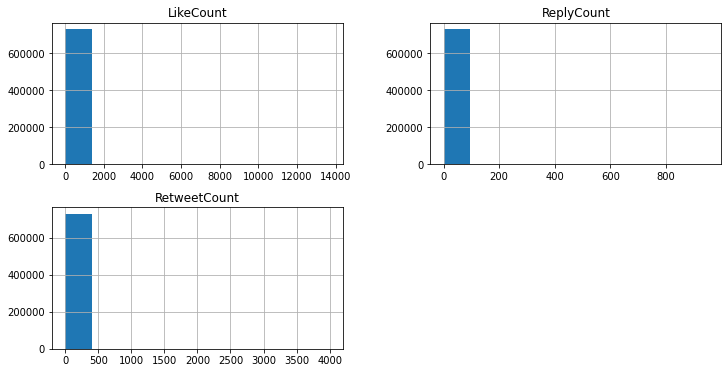

In [32]:
df[['LikeCount', 'ReplyCount', 'RetweetCount']].hist(figsize= (12, 6))
plt.show()
#Histograma de las variables numéricas

In [36]:
df.groupby('User').size().reset_index(name='Count').sort_values(by='Count',ascending=False)
#Esto es lo mismo que hicimos arriba pero más lindo

,User,Count
2,EL PAÍS,287310
3,El Observador,165246
4,La República,155983
5,la diaria,80520
1,BÚSQUEDA,27301
0,Brecha,12433


In [39]:
df.groupby(['PostDate','User']).size().reset_index(name='Count').sort_values(by='Count',ascending=False)

,PostDate,User,Count
656213,2020-11-30 12:08:36,EL PAÍS,55
649829,2020-11-13 08:00:13,EL PAÍS,34
638631,2020-10-14 07:53:24,EL PAÍS,33
646751,2020-11-05 07:45:42,EL PAÍS,33
710132,2021-04-29 07:34:14,EL PAÍS,32
...,...,...,...
239312,2017-01-03 02:59:59,El Observador,1
239313,2017-01-03 03:06:25,EL PAÍS,1
239314,2017-01-03 03:17:22,EL PAÍS,1
239315,2017-01-03 03:28:22,EL PAÍS,1


In [40]:
df['year'] = df['PostDate'].dt.year
df['month'] = df['PostDate'].dt.month
#Creamos columnas con mes y año por separado

In [48]:
df.groupby(['year','User']).size().reset_index(name='Count').sort_values(by=('year'),ascending=False)
#Ver para que agrupe por año y usuario

,year,User,Count
64,2021,la diaria,10084
63,2021,La República,8857
62,2021,El Observador,11129
61,2021,EL PAÍS,22552
60,2021,BÚSQUEDA,1145
...,...,...,...
4,2011,Brecha,219
2,2010,EL PAÍS,9437
1,2010,BÚSQUEDA,377
3,2010,la diaria,844


<AxesSubplot:xlabel='year,User'>

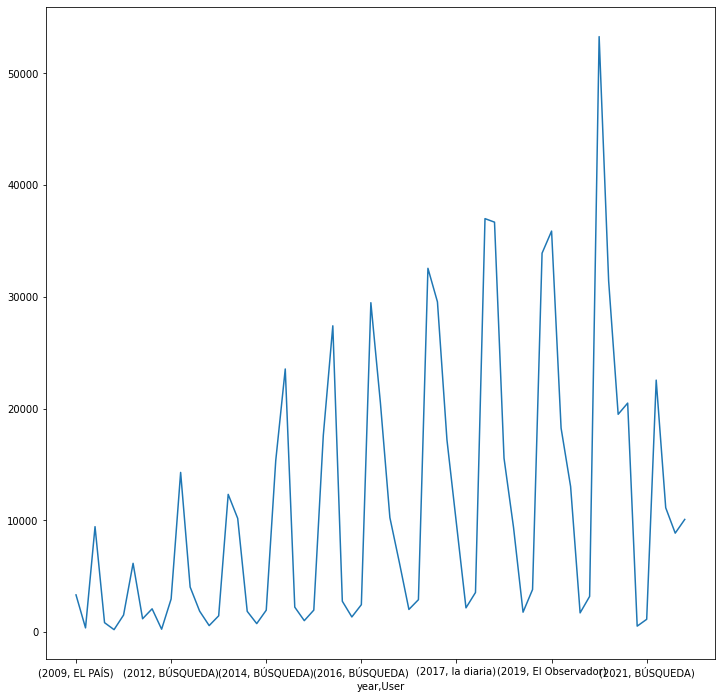

In [56]:
df.groupby([df['year'],df['User']]).size().plot(figsize=(12, 12))

In [60]:
df.sort_values(by='RetweetCount', ascending = False)[['Tweet', 'RetweetCount', 'PostDate', 'User']][:10]
#Los 10 tweets más retweeteados con fecha y autor

,Tweet,RetweetCount,PostDate,User
263191,Tiene 12 años y fue becada para viajar a la NA...,4000.0,2018-05-13 10:07:06,EL PAÍS
345166,Bolsonaro cruzó la avenida de las leyes para s...,2600.0,2020-03-01 16:40:18,EL PAÍS
259344,Hinchas uruguayos se inspiraron en los japones...,2300.0,2018-06-20 17:44:55,EL PAÍS
240965,AHORA | El gobierno uruguayo no concederá asil...,2200.0,2018-12-03 13:16:37,EL PAÍS
556052,"“El baile de los que sobran”, la canción de Lo...",1900.0,2019-10-22 22:30:48,la diaria
249381,Revolucionó la educación de Perú y ahora llega...,1700.0,2018-09-04 18:43:35,EL PAÍS
522490,Nuestra portada de hoy,1600.0,2021-04-30 10:30:34,la diaria
207408,La reacción del presidente electo @LuisLacall...,1400.0,2019-12-02 16:25:46,EL PAÍS
327271,"Lacalle, en entrevista con @todonoticias : ""L...",1100.0,2020-07-15 01:53:51,EL PAÍS
62699,El tricolor es el club que ganó más torneos of...,1100.0,2017-04-01 12:45:00,El Observador


In [61]:
df.sort_values(by='RetweetCount', ascending = False)[['Tweet', 'LikeCount', 'PostDate', 'User']][:10]
#Los 10 tweets más likeados con fecha y autor

,Tweet,LikeCount,PostDate,User
263191,Tiene 12 años y fue becada para viajar a la NA...,13700.0,2018-05-13 10:07:06,EL PAÍS
345166,Bolsonaro cruzó la avenida de las leyes para s...,7200.0,2020-03-01 16:40:18,EL PAÍS
259344,Hinchas uruguayos se inspiraron en los japones...,5800.0,2018-06-20 17:44:55,EL PAÍS
240965,AHORA | El gobierno uruguayo no concederá asil...,3600.0,2018-12-03 13:16:37,EL PAÍS
556052,"“El baile de los que sobran”, la canción de Lo...",3600.0,2019-10-22 22:30:48,la diaria
249381,Revolucionó la educación de Perú y ahora llega...,2700.0,2018-09-04 18:43:35,EL PAÍS
522490,Nuestra portada de hoy,3400.0,2021-04-30 10:30:34,la diaria
207408,La reacción del presidente electo @LuisLacall...,1400.0,2019-12-02 16:25:46,EL PAÍS
327271,"Lacalle, en entrevista con @todonoticias : ""L...",4800.0,2020-07-15 01:53:51,EL PAÍS
62699,El tricolor es el club que ganó más torneos of...,947.0,2017-04-01 12:45:00,El Observador


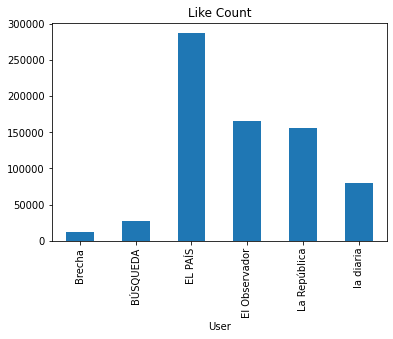

In [66]:
df.groupby('User').size().plot.bar(x='year',y='LikeCount',title='Like Count')
plt.show()
#Plot de los likes según autor

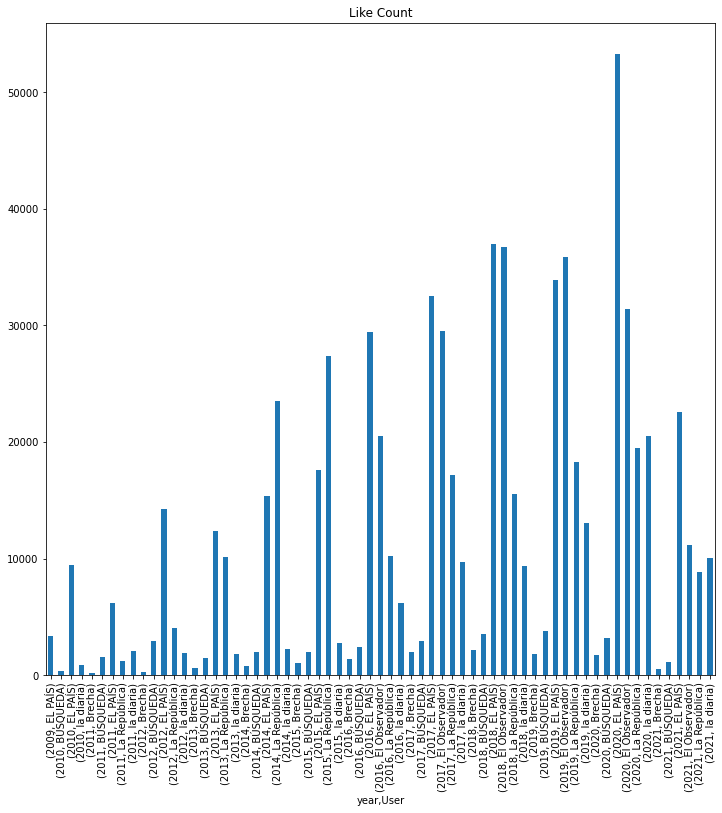

In [70]:
df.groupby(['year', 'User']).size().plot.bar(x='year',y='LikeCount',title='Like Count', figsize=(12,12))
plt.show()

In [76]:
df[df['User']=='EL PAÍS'].groupby('year')['RetweetCount'].head(5)


204980    2.0
204981    2.0
204982    1.0
204983    1.0
204984    2.0
         ... 
459731    0.0
459732    3.0
459733    1.0
459734    1.0
459735    3.0
Name: RetweetCount, Length: 65, dtype: float64